In [28]:
import pandas as pd

In [29]:
housing = pd.read_csv("housing_data.csv")

In [30]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [33]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [34]:
import matplotlib.pyplot as plt

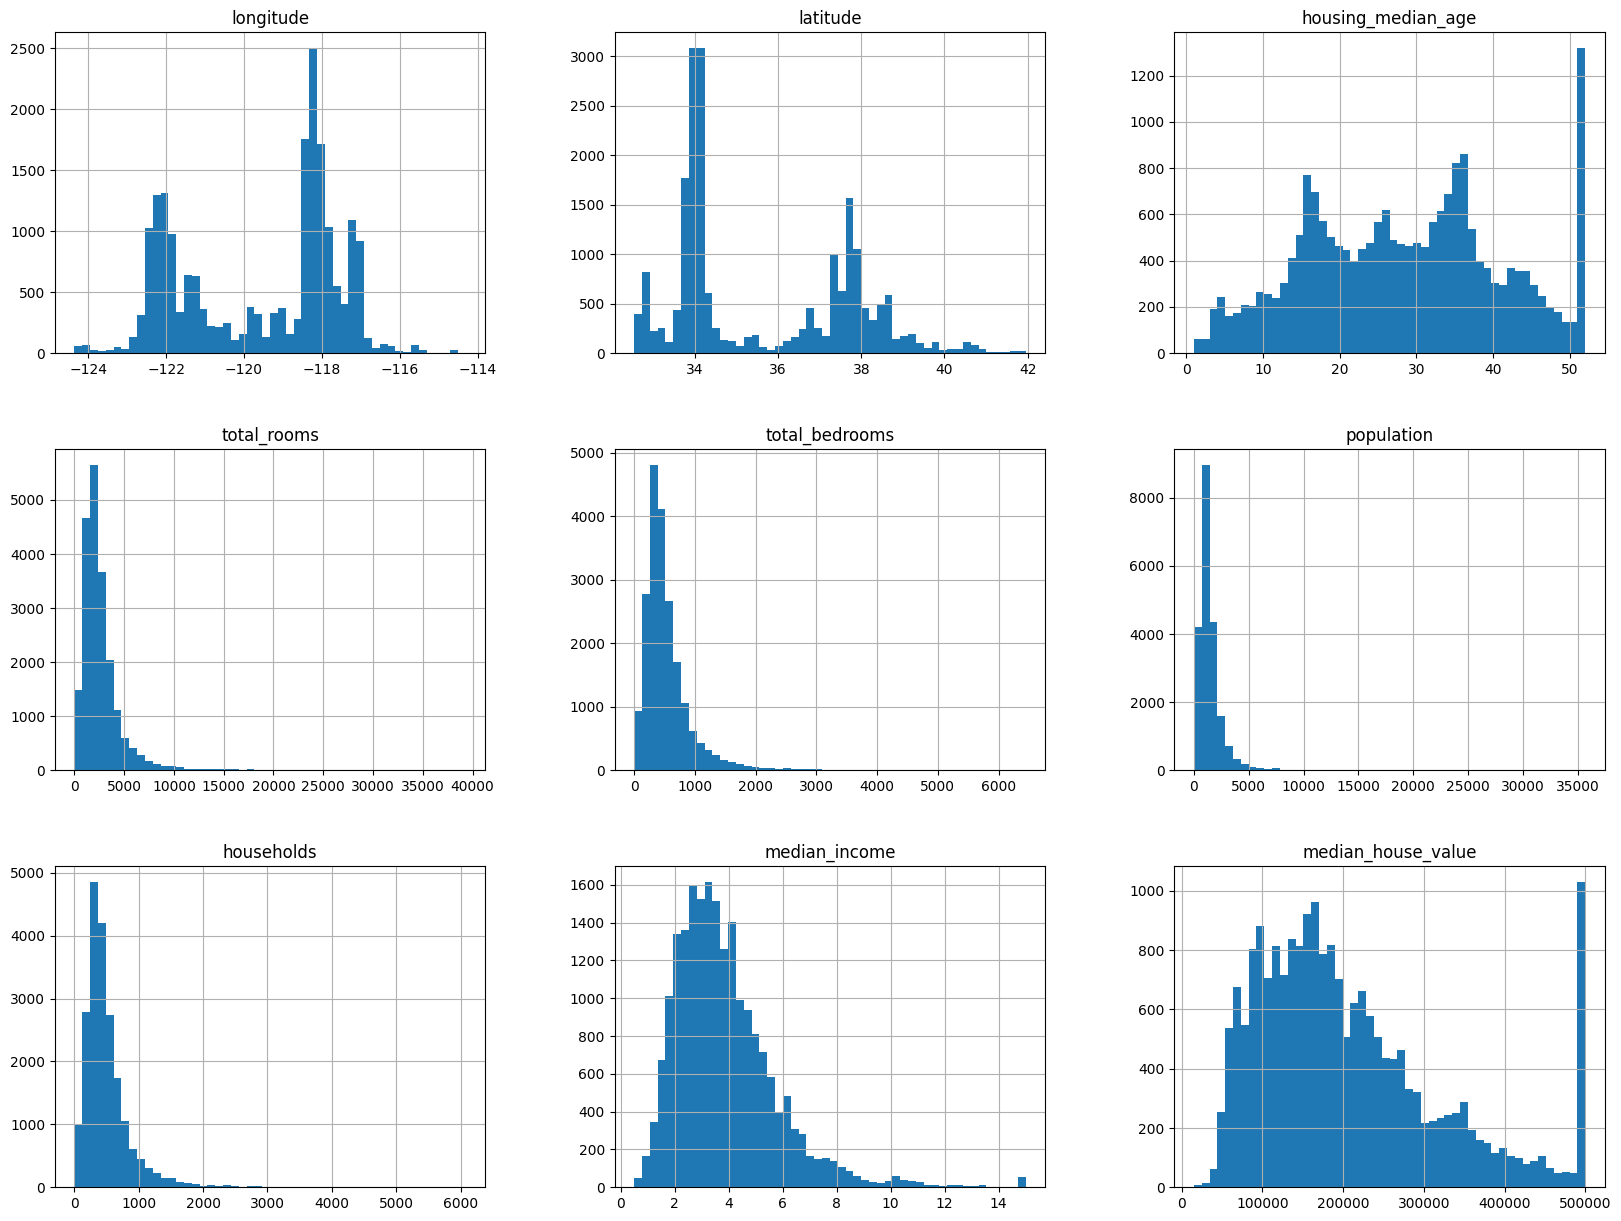

In [35]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Profile Report

In [36]:
from ydata_profiling import ProfileReport

In [37]:
profile = ProfileReport(housing, title="Housing Data Report", explorative=True)


In [38]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 579.45it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Create a Test Set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [41]:
len(train_set)

16512

In [42]:
len(test_set)

4128

In [43]:
import numpy as np

#  Histogram of income categories

In [44]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<Axes: >

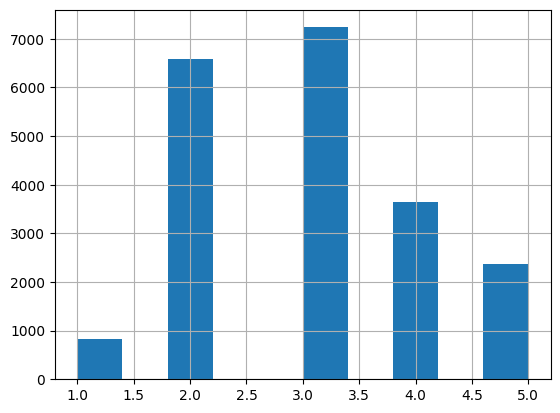

In [45]:
housing["income_cat"].hist()

In [46]:
train_set, test_set = train_test_split(
housing,                    # The dataset to split
test_size=0.2,              # Keep 20% for testing (80% for training)
random_state=42,            # Set random seed for reproducibility
stratify=housing['income_cat']  # Use income categories for stratification
)

# Why We Use `stratify=housing['income_cat']` in Train-Test Split

The `stratify` parameter ensures that the training and test sets maintain the same proportion of different categories as the original dataset. Here’s why this is crucial:

## 1. Avoids Biased Sampling

**Problem:**  
If we split randomly, some categories might get overrepresented or missing in the test set.  

**Example:**  
If 20% of houses are "low-income," random splitting might accidentally exclude most of them.  

**Solution:**  
`stratify` guarantees that 20% of each income group goes to the test set.  

**Ensures fairness** – No group is left out or overrepresented.  

## 2. Better Model Generalization

A model trained on all income groups equally will perform well in real-world scenarios.  

If the test set lacks certain groups, we can’t trust the model’s accuracy.  

**Example:**  
- **Without Stratification** → Test set might have only rich neighborhoods → Model fails for poor areas.  
- **With Stratification** → Test set has rich, middle-class, and poor houses → Model works for everyone.  

## 3. Works for Any Categorical Data

`stratify` is not just for income—it works for:  
- **Medical Data:** Ensuring equal representation of sick/healthy patients.  
- **E-commerce:** Balancing product categories (e.g., electronics, clothes).  
- **Education:** Keeping the same ratio of pass/fail students in test data.  

**Formula:**  
If the original dataset has:  
- 10% Category A  
- 30% Category B  
- 60% Category C  

Then the test set (`test_size=0.2`) will have:  
- 2% A (20% of 10%)  
- 6% B (20% of 30%)  
- 12% C (20% of 60%)  

## 4. When Should You Use `stratify`?

✔ **Classification Problems** (Predicting categories like spam/not spam).  
✔ **Imbalanced Datasets** (Where some categories are rare).  
✔ **Fairness-Critical Applications** (Housing, loans, healthcare).  

**Not needed for:**  
- Regression problems (predicting continuous numbers like temperature).  
- When data is already perfectly balanced.  

In [47]:
train_set['income_cat'].value_counts(normalize=True).sort_index()

income_cat
1    0.039789
2    0.318859
3    0.350594
4    0.176296
5    0.114462
Name: proportion, dtype: float64

In [48]:
housing['income_cat'].value_counts(normalize=True).sort_index()

income_cat
1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: proportion, dtype: float64

In [49]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3          4  
4          3

In [50]:
housing.drop('income_cat', axis=1, inplace=True) if 'income_cat' in housing.columns else None

# Why Do We Remove the `income_cat` Column?

## 1. It Served Its Purpose
- We only created `income_cat` to **split the data fairly** (like using a measuring cup)
- Now that we have our training/test sets, we **don't need it** for actual modeling

## 2. Avoid Cheating
- If we keep it, the AI might **use income categories to guess prices** (like a student peeking at answer keys)
- We want the AI to learn from **real features** (bedrooms, location) — not artificial labels!

## 3. Keep Data Original
- The `income_cat` column **wasn't in the original dataset**
- We're restoring the data to its **pure form** for exploration

In [51]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [53]:
housing = train_set.copy()

# Why We Use `.copy()` in Pandas

`housing = train_set.copy()` creates a **safe, independent copy** of your training data.

## Key Reasons
1.  **Avoid accidental changes** to the original `train_set`
2.  **Keep original data clean** for final model training
3.  **Prevent Pandas warnings** when modifying data

## Example Comparison
```python
Risky: housing = train_set        # Changes affect original
Safe:   housing = train_set.copy() # Changes stay isolated

# Discover and Visualize the Data to Gain Insights

<Axes: xlabel='longitude', ylabel='latitude'>

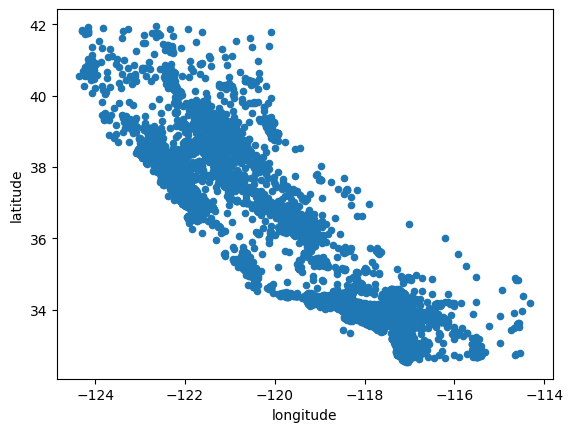

In [55]:
# Visualizing Geographical Data
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

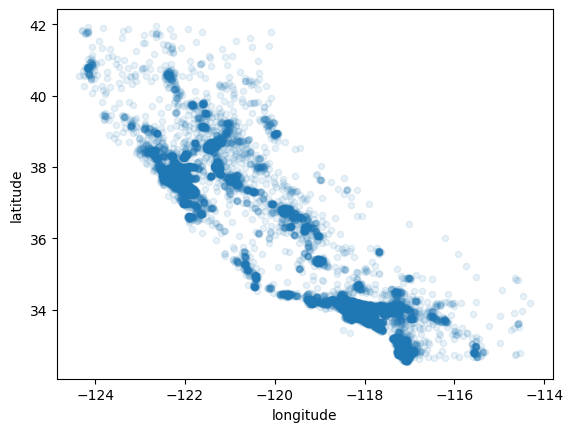

In [56]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

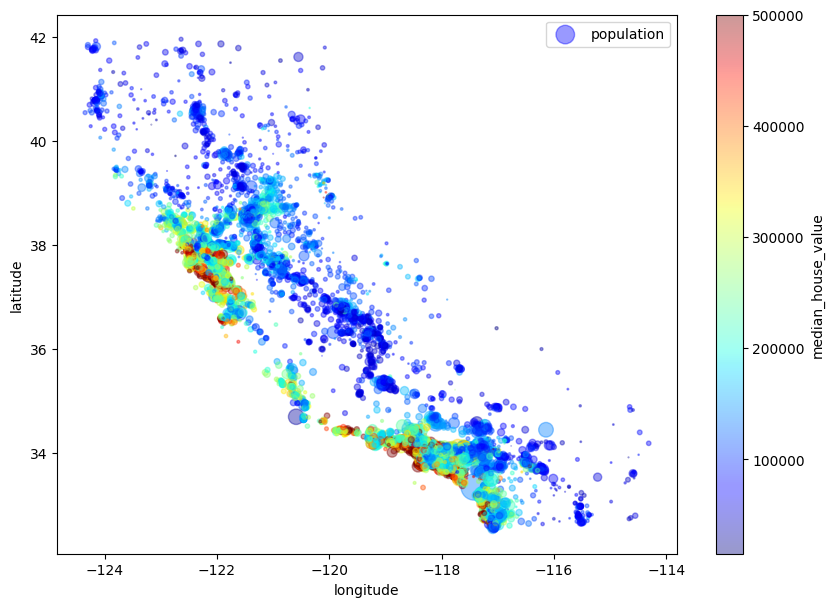

In [57]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()